**Imports**

In [1]:
import paarti.utils.maos_utils as mu
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

**Calculation of On-Sky Metrics as a function of Aperture Size**

In [2]:
# Fetch names of all currently available on-sky data
dates = [f[-17:-9] for f in glob.glob(f"/u/bdigia/work/ao/airopa_input/*/")]
sky_paths = []
# For easy creation of legend handles
names = []
for date in dates:
    paths = [f for f in glob.glob(f"/u/bdigia/work/ao/airopa_input/{date}nirc2_kp/*_psf.fits")]
    sky_paths.extend(paths)
    name = [f[-14:-9] for f in glob.glob(f"/u/bdigia/work/ao/airopa_input/{date}nirc2_kp/*_psf.fits")]
    names.extend(name)

In [ ]:
aperture_sizes = np.linspace(0.1, 0.9, num=9)
print(f"Aperture sizes: {aperture_sizes} arcsec")

all_aperture_sky_strehls_skysub = np.empty((len(sky_paths), len(aperture_sizes)))
all_aperture_sky_strehls = np.empty((len(sky_paths), len(aperture_sizes)))
all_aperture_sky_fwhms_skysub = np.empty((len(sky_paths), len(aperture_sizes)))
all_aperture_sky_fwhms = np.empty((len(sky_paths), len(aperture_sizes)))
all_aperture_sky_rmswfes_skysub = np.empty((len(sky_paths), len(aperture_sizes)))
all_aperture_sky_rmswfes = np.empty((len(sky_paths), len(aperture_sizes)))
for i, aper in enumerate(aperture_sizes):
    sky_strehls_skysub, sky_fwhms_skysub, sky_rmswfes_skysub = mu.calc_strehl_on_sky(sky_paths, "temp.txt", apersize=aper, skysub=True)
    # Skysub default = False
    sky_strehls, sky_fwhms, sky_rmswfes = mu.calc_strehl_on_sky(sky_paths, "temp.txt", apersize=aper)
    # Each row of below arrays corresponds to one on-sky observation/fits with metrics calculated with each of above aperture sizes
    all_aperture_sky_strehls_skysub[:,i] = sky_strehls_skysub
    all_aperture_sky_strehls[:,i] = sky_strehls
    all_aperture_sky_fwhms_skysub[:,i] = sky_fwhms_skysub
    all_aperture_sky_fwhms[:,i] = sky_fwhms
    all_aperture_sky_rmswfes_skysub[:,i] = sky_rmswfes_skysub
    all_aperture_sky_rmswfes[:,i] = sky_rmswfes

In [4]:
all_aperture_sky_strehls_skysub

array([[0.2278495 , 0.22282135, 0.22079326, ..., 0.21259511, 0.21269208,
        0.21274609],
       [0.26264654, 0.25738658, 0.25569504, ..., 0.24640948, 0.24652187,
        0.24658448],
       [0.24648222, 0.24180599, 0.24042327, ..., 0.23139408, 0.23149962,
        0.23155841],
       ...,
       [0.11683128, 0.11485999, 0.11373282, ..., 0.10768003, 0.10772914,
        0.1077565 ],
       [0.19565187, 0.19346605, 0.19217122, ..., 0.18325903, 0.18334262,
        0.18338918],
       [0.19124933, 0.18924928, 0.18776482, ..., 0.17887452, 0.17895611,
        0.17900155]])

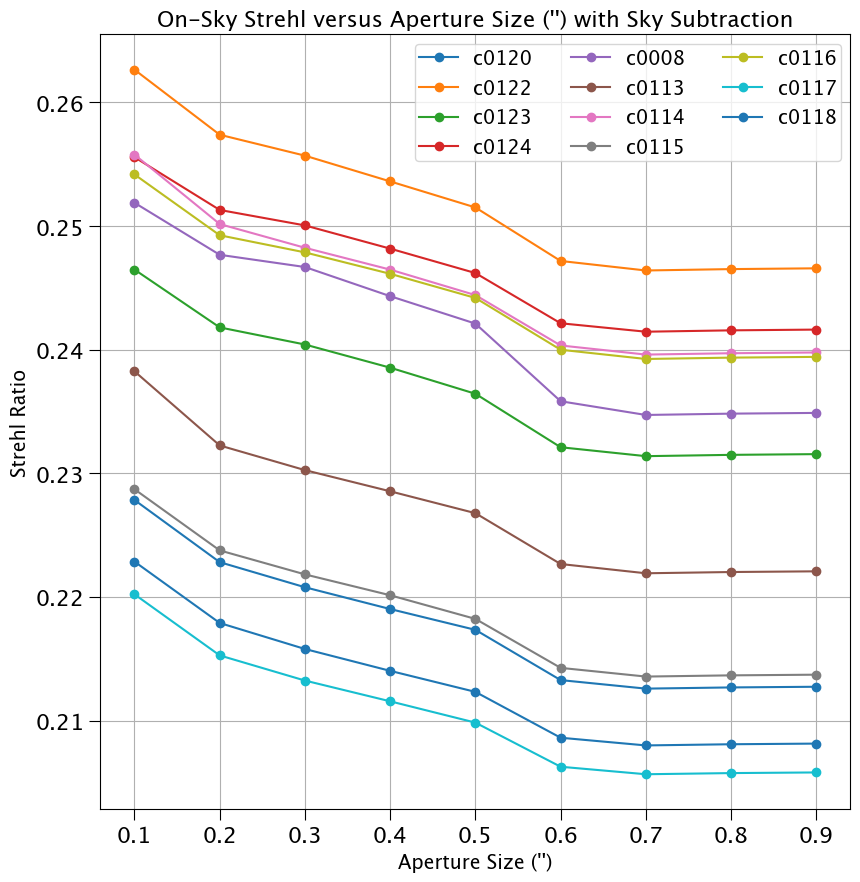

In [5]:
plt.figure(figsize=(10, 10))
for i in range(len(sky_paths)//15):
    plt.plot(aperture_sizes, all_aperture_sky_strehls_skysub[i,:], "o-", label=f"{names[i]}")
plt.title("On-Sky Strehl versus Aperture Size (\'\') with Sky Subtraction", fontsize=16)
plt.xlabel('Aperture Size (\'\')', fontsize=14)
plt.ylabel('Strehl Ratio', fontsize=14)
plt.legend(loc="best", fontsize=14, ncol=3)
plt.grid(True)
plt.show()

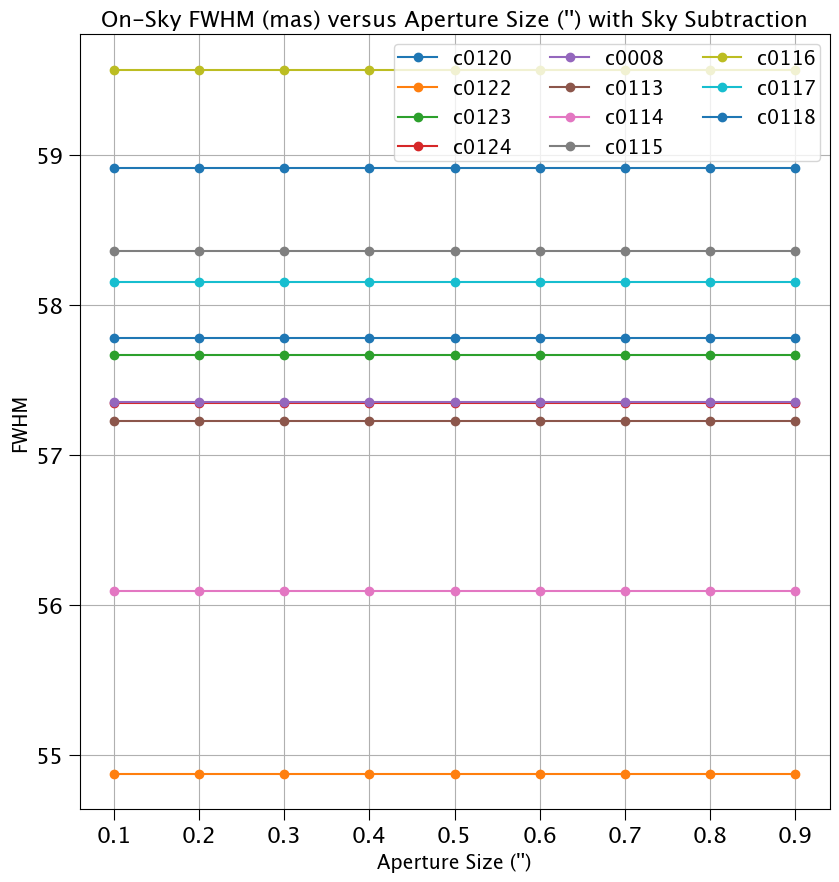

In [6]:
plt.figure(figsize=(10, 10))
for i in range(len(sky_paths)//15):
    plt.plot(aperture_sizes, all_aperture_sky_fwhms_skysub[i,:], "o-", label=f"{names[i]}")
plt.title("On-Sky FWHM (mas) versus Aperture Size (\'\') with Sky Subtraction", fontsize=16)
plt.xlabel('Aperture Size (\'\')', fontsize=14)
plt.ylabel('FWHM', fontsize=14)
plt.legend(loc="best", fontsize=14, ncol=3)
plt.grid(True)
plt.show()

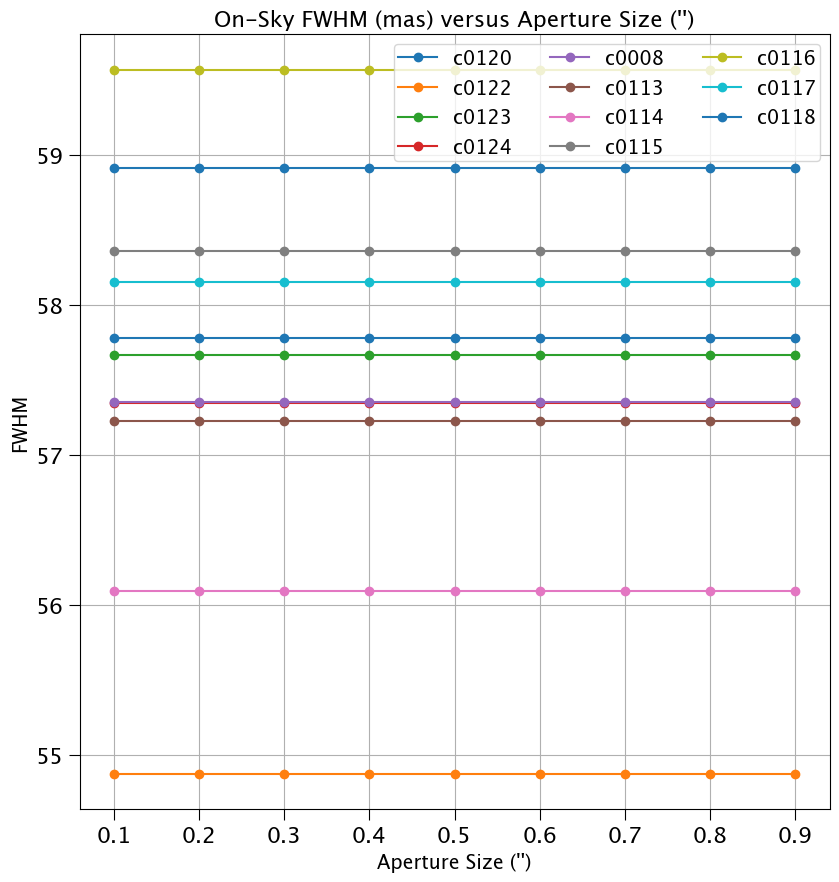

In [7]:
plt.figure(figsize=(10, 10))
for i in range(len(sky_paths)//15):
    plt.plot(aperture_sizes, all_aperture_sky_fwhms[i,:], "o-", label=f"{names[i]}")
plt.title("On-Sky FWHM (mas) versus Aperture Size (\'\')", fontsize=16)
plt.xlabel('Aperture Size (\'\')', fontsize=14)
plt.ylabel('FWHM', fontsize=14)
plt.legend(loc="best", fontsize=14, ncol=3)
plt.grid(True)
plt.show()

In [8]:
all_aperture_sky_strehls

array([[0.21296024, 0.21296024, 0.21296024, ..., 0.21296024, 0.21296024,
        0.21296024],
       [0.24683268, 0.24683268, 0.24683268, ..., 0.24683268, 0.24683268,
        0.24683268],
       [0.23179148, 0.23179148, 0.23179148, ..., 0.23179148, 0.23179148,
        0.23179148],
       ...,
       [0.10786497, 0.10786497, 0.10786497, ..., 0.10786497, 0.10786497,
        0.10786497],
       [0.18357378, 0.18357378, 0.18357378, ..., 0.18357378, 0.18357378,
        0.18357378],
       [0.17918172, 0.17918172, 0.17918172, ..., 0.17918172, 0.17918172,
        0.17918172]])

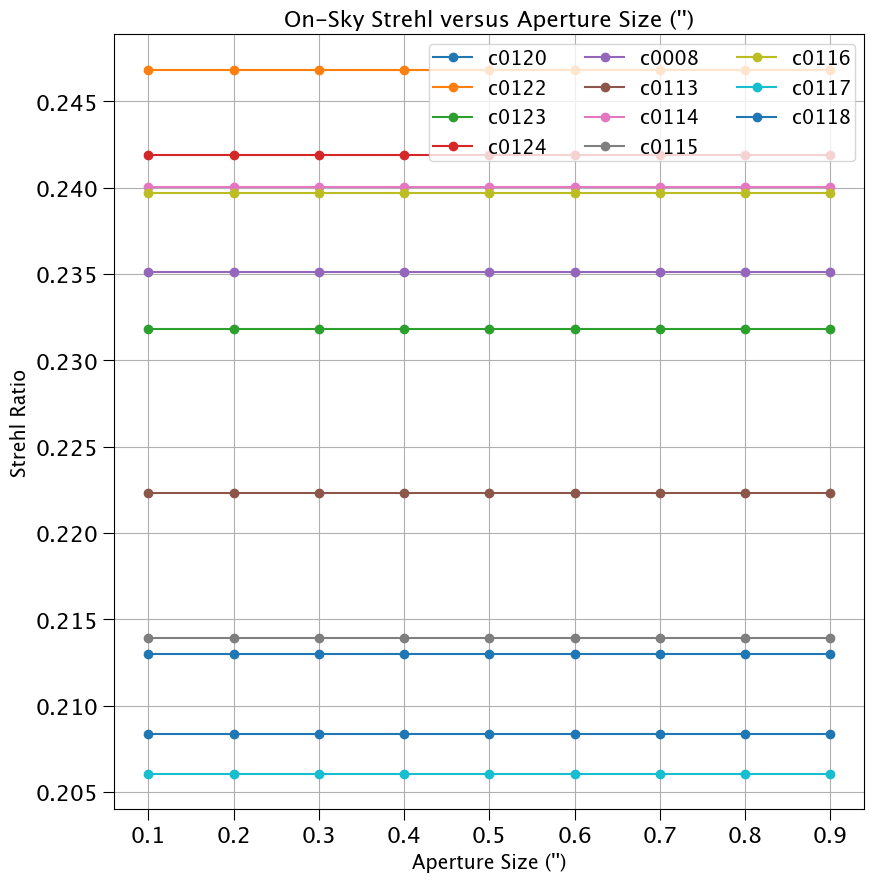

In [9]:
plt.close()
plt.figure(figsize=(10, 10))
for i in range(len(sky_paths)//15):
    plt.plot(aperture_sizes, all_aperture_sky_strehls[i,:], "o-", label=f"{names[i]}")
plt.title("On-Sky Strehl versus Aperture Size (\'\')", fontsize=16)
plt.xlabel('Aperture Size (\'\')', fontsize=14)
plt.ylabel('Strehl Ratio', fontsize=14)
plt.legend(loc="upper right", fontsize=14, ncol=3)
plt.grid(True)
plt.show()

**Gather Sky & Simulation Data**

In [ ]:
# Pull sky frames
seeds = np.array([1, 1000, 5000, 10000])
all_frames = mu.fetch_sky_frames(seeds)

**Display Dataframe**

In [24]:
all_frames

,frames,dates,mjd,expstarts,expstops,airmasses,frieds,dimms,dimmtimes,masses,...,maosfwhms,maos_fwhm_stds,lbwfsfwhms,skyrmswfes,maosrmswfes,maos_rmswfe_stds,lgsrmswfes,totmaoswfe,homaoswfe,ttmaoswfe
0,c0122,20100815,55423.31624,07:35:22.783,07:36:05.908,1.58649,0.38872982715798937,0.26,7:33:8,0.25,...,49.67853380763467,1.978819984458417,0.961245,399.93796590703283,326.85688560402417,15.613119167665612,114.9,359.9219508101804,262.77748904980854,244.49266948028418
1,c0123,20100815,55423.31695,07:36:24.268,07:37:07.095,1.58896,0.2731615001650736,0.37,7:38:42,0.25,...,49.6921792122686,1.9034230045145155,0.941616,408.825756735311,340.5259415784006,17.24819557683886,149.7,378.09215699884817,285.7691291730636,246.54719458855817
2,c0124,20100815,55423.31752,07:37:13.618,07:37:56.758,1.59099,0.2731615001650736,0.37,7:38:42,0.25,...,49.840380517320355,1.96927879834025,0.976184,402.8288143943166,340.672766040515,15.4062383395859,195.4,378.82735972492884,285.10621266662463,248.42473261295405
3,c0008,20100815,55423.24293,05:49:49.016,05:50:32.269,1.55171,0.2062648062470964,0.49,5:50:21,0.16,...,47.99465780675915,0.7255294270501218,0.975762,406.8222653757747,333.4255440805857,5.442582234415263,210.9,360.0070236696744,296.6470500243335,203.82490595300519
4,c0113,20100815,55423.31094,07:27:45.336,07:28:28.293,1.56953,0.3368991835369241,0.3,7:28:38,0.12,...,47.233136568561825,0.36426947478820265,0.955617,414.6278647734938,313.0062254105867,5.106104267814511,200.4,338.0726824528921,271.44788688467503,201.4727938518792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,c0047,20130426,56408.56839,13:38:29.391,13:39:11.865,1.51809,0.12325579885497225,0.82,13:39:5,0.25,...,54.94312510663057,2.505680556037641,1.059975,443.82739306312857,443.1618949896173,15.331016336367988,155.2,505.7298633397771,434.95732002289475,257.98193381141505
169,c0128,20130426,56408.61833,14:50:24.049,14:51:06.524,1.5853,0.24064227395494578,0.42,14:49:2,0.43,...,51.31286456002941,1.6429240469204875,1.127611,530.8157687171655,338.16347238465625,7.95306862116953,124.4,369.96724746820854,281.2210922870885,240.12454542436885
170,c0129,20130426,56408.61892,14:51:19.119,14:52:01.594,1.58733,0.24064227395494578,0.42,14:49:2,0.43,...,51.34024840304242,1.341504343548382,1.09229,504.5739131654446,338.36952418229174,6.317214306747286,198.4,370.61259997736744,280.1976101638697,242.44775204393068
171,c0048,20130426,56408.56898,13:39:20.420,13:40:02.896,1.51776,0.12325579885497225,0.82,13:39:5,0.25,...,54.380784347923495,2.673719031549016,1.068358,440.2298488356656,442.76256482888255,18.432310038341335,142.7,506.57966326290847,435.753308096463,258.3229176694086


**Plotting**

In [25]:
# Generate color groups and list
colors = {'20100815': 'red', '20110823': 'orange', '20120724':'gold', '20140804':'lime', 
          '20140806':'dodgerblue', '20150809':'blueviolet', '20170811':'magenta', 
          '20170824':'cyan', '20140704':'blueviolet', '20150514':'gray', 
          '20130426':'crimson', '20140320':'brown'}
color_list = [colors[group] for group in all_frames['dates']]

*Sky Metrics versus Seeing Conditions*

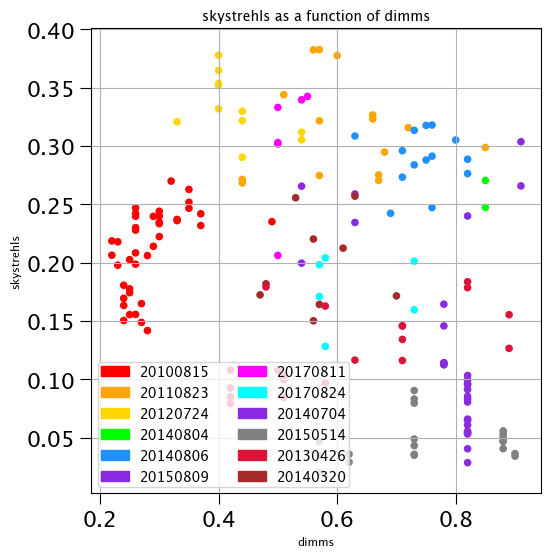

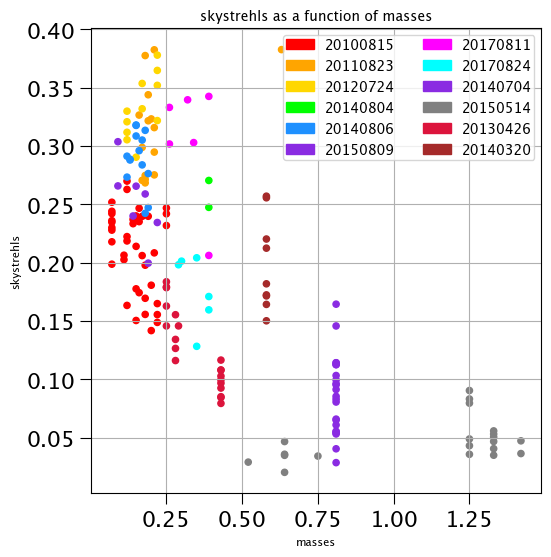

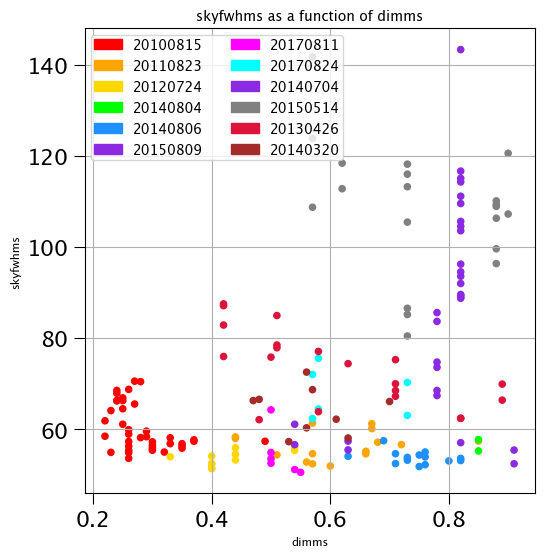

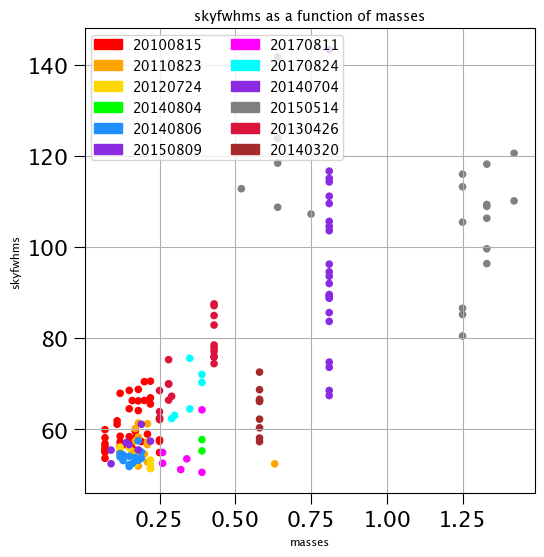

In [26]:
mu.sky_plot('dimms', 'skystrehls', all_frames, colors)
mu.sky_plot('masses', 'skystrehls', all_frames, colors)
mu.sky_plot('dimms', 'skyfwhms', all_frames, colors)
mu.sky_plot('masses', 'skyfwhms', all_frames, colors)

*Sky Metrics versus Weather Conditions*

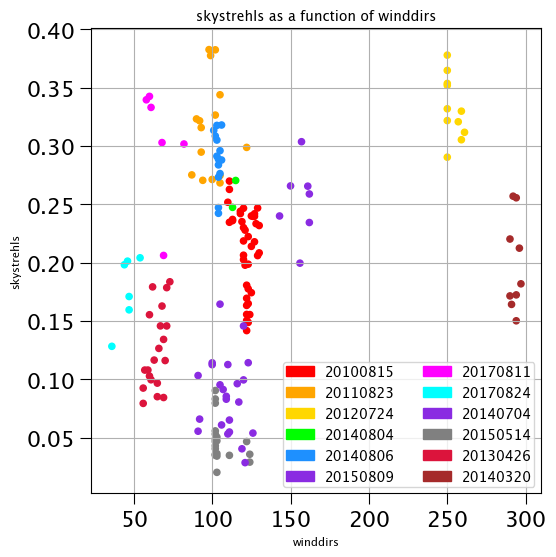

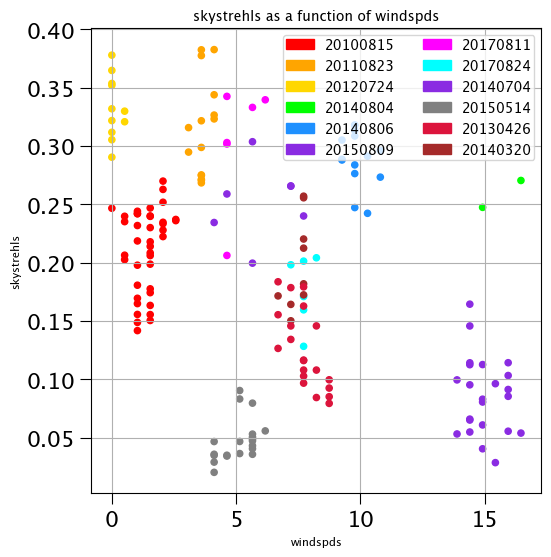

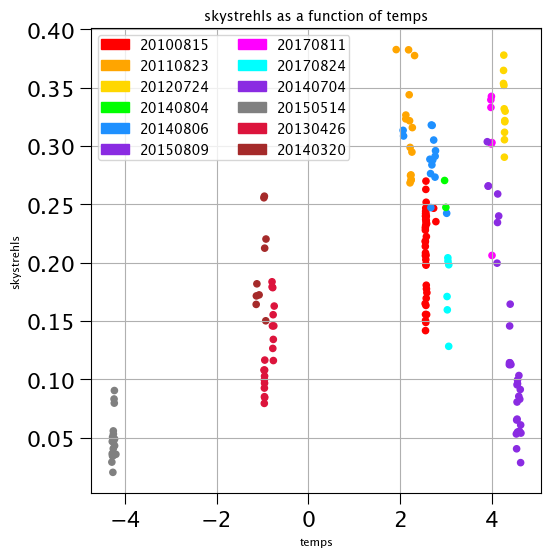

In [27]:
mu.sky_plot('winddirs', 'skystrehls', all_frames, colors)
mu.sky_plot('windspds', 'skystrehls', all_frames, colors)
mu.sky_plot('temps', 'skystrehls', all_frames, colors)

*Sky Metrics versus MAOS metrics*

(0.0, 150.0)

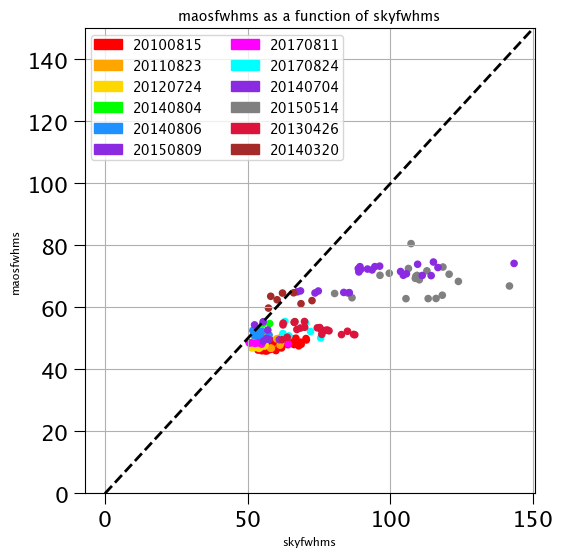

In [31]:
mu.sky_plot('skyfwhms', 'maosfwhms', all_frames, colors)
# y = x line (desired relationship)
plt.axline((0, 0), (1, 1), linewidth=2, color='black', linestyle="--")
plt.ylim(0.0, 150.0)
plt.ylim(0.0, 150.0)

(0.0, 0.5)

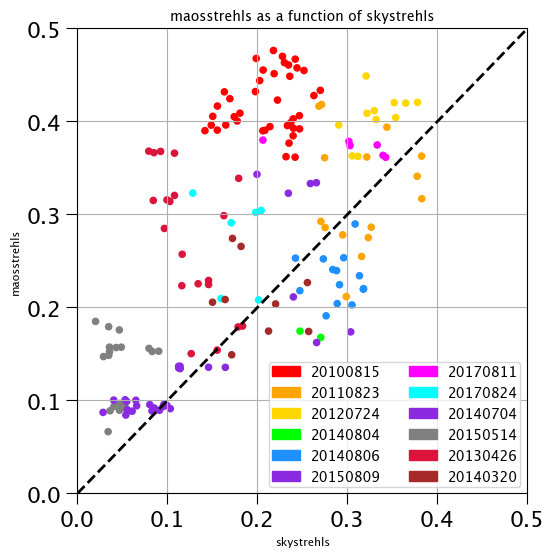

In [34]:
mu.sky_plot('skystrehls', 'maosstrehls', all_frames, colors)
# y = x line (desired relationship)
plt.axline((0, 0), (1, 1), linewidth=2, color='black', linestyle="--")
plt.ylim(0.0, 0.5)
plt.xlim(0.0, 0.5)

(250.0, 600.0)

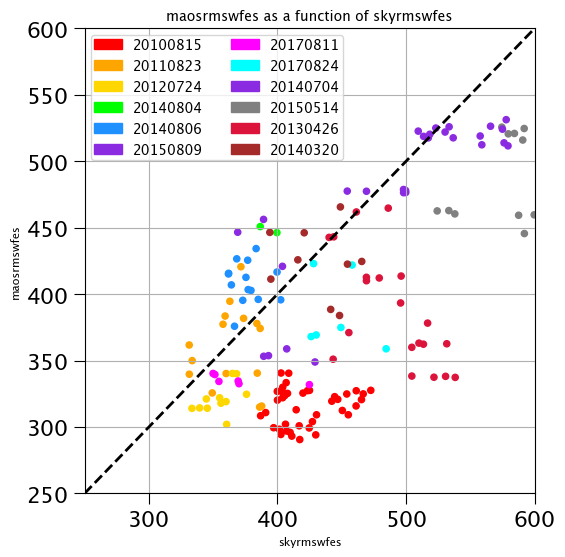

In [38]:
mu.sky_plot('skyrmswfes', 'maosrmswfes', all_frames, colors)
# y = x line (desired relationship)
plt.axline((0, 0), (1, 1), linewidth=2, color='black', linestyle="--")
plt.ylim(250.0, 600.0)
plt.xlim(250.0, 600.0)

Text(0, 0.5, 'MAOS HO WFE (nm)')

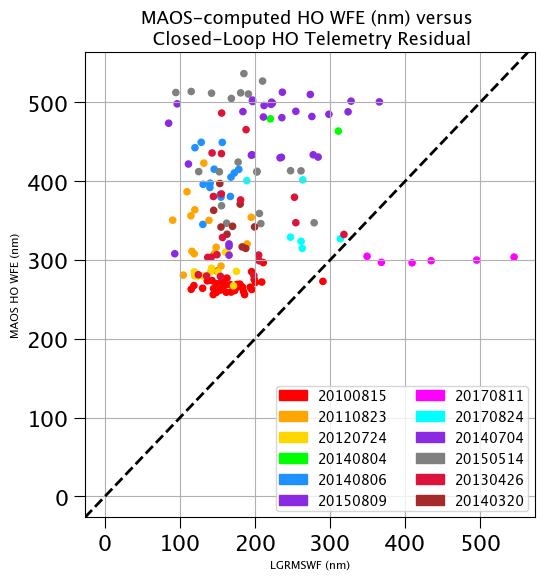

In [43]:
mu.sky_plot('lgsrmswfes', 'homaoswfe', all_frames, colors)
# y = x line (desired relationship)
plt.axline((0, 0), (1, 1), linewidth=2, color='black', linestyle="--")
plt.title("MAOS-computed HO WFE (nm) versus \n Closed-Loop HO Telemetry Residual", fontsize=13)
plt.xlabel("LGRMSWF (nm)")
plt.ylabel('MAOS HO WFE (nm)')

**Collect Current MAOS & Plot**

*In case of mismatch between on-sky observations and MAOS simulations run*

In [11]:
seeds = np.array([1, 1000, 5000, 10000])

In [9]:
import glob
dates = [f[-17:-9] for f in glob.glob(f"/u/bdigia/work/ao/airopa_input/*/")]
names = []
datecol = []
sky_paths = []
for date in dates:
    name = [f[-14:-9] for f in glob.glob(f"/u/bdigia/work/ao/airopa_input/{date}nirc2_kp/*_psf.fits")]
    paths = [f for f in glob.glob(f"/u/bdigia/work/ao/airopa_input/{date}nirc2_kp/*_psf.fits")]
    names.extend(name)
    temp = np.full(len(name), date)
    datecol.extend(temp.tolist())
    sky_paths.extend(paths)

names = np.array(names)
datecol = np.array(datecol)    
namesanddates = np.column_stack((names, datecol))

In [12]:
maos_strehls, maos_strehl_stds, maos_fwhms, maos_fwhm_stds, maos_rmswfes, maos_rmswfe_stds = mu.collect_maos_results(seeds, namesanddates)

Error while calculating metrics for c0020 on 20110823: Empty or corrupt FITS file --> using NaN for metrics
Error while calculating metrics for c0020 on 20110823: Empty or corrupt FITS file --> using NaN for metrics
Error while calculating metrics for c0020 on 20110823: Empty or corrupt FITS file --> using NaN for metrics
Error while calculating metrics for c0020 on 20110823: Empty or corrupt FITS file --> using NaN for metrics
Error while calculating metrics for c0033 on 20140320: list index out of range --> using NaN for metrics


In [13]:
clean_i = np.argwhere(~np.isnan(maos_strehls))
clean_i = clean_i.flatten()
maos_strehls_clean = maos_strehls[clean_i]
maos_fwhms_clean = maos_fwhms[clean_i]
maos_rmswfes_clean = maos_rmswfes[clean_i]
corr_skystrehls =  all_aperture_sky_strehls[:,2][clean_i]
corr_skyfwhms = all_aperture_sky_fwhms[:,2][clean_i]
corr_skyrmswfes = all_aperture_sky_rmswfes[:,2][clean_i]

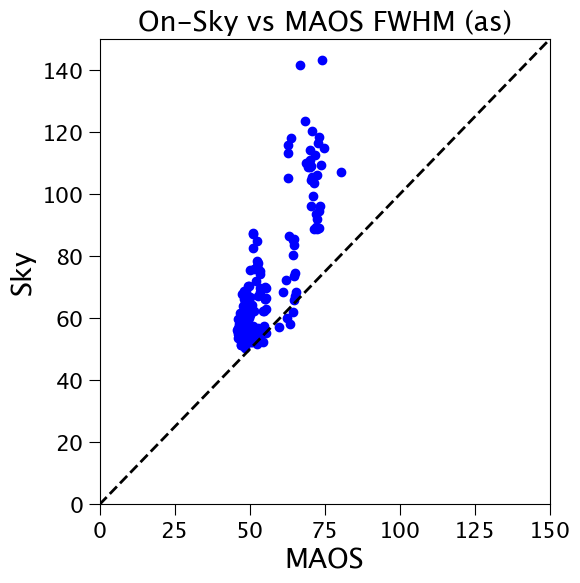

In [15]:
plt.close()
plt.scatter(maos_fwhms_clean, corr_skyfwhms, color="blue")
plt.title("On-Sky vs MAOS FWHM (as)")
plt.xlabel('MAOS')
plt.ylabel('Sky')
plt.axline((0, 0), (1, 1), linewidth=2, color='black', linestyle="--")
plt.xlim(0.0, 150.0)
plt.ylim(0.0, 150.0)
plt.show()

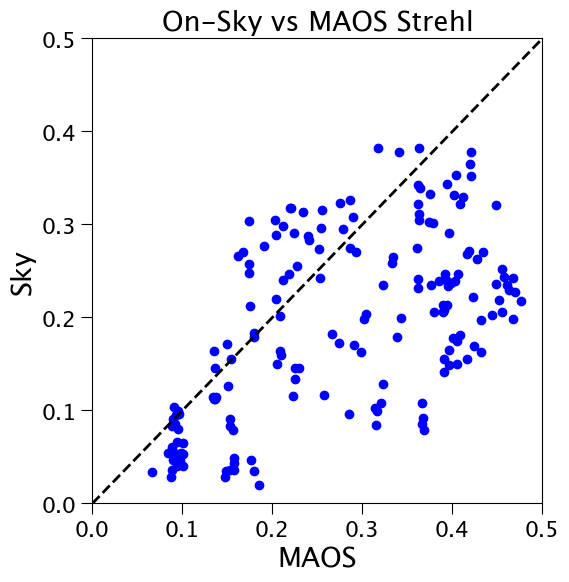

In [17]:
plt.close()
plt.scatter(maos_strehls_clean, corr_skystrehls, color="blue")
plt.title("On-Sky vs MAOS Strehl")
plt.xlabel('MAOS')
plt.ylabel('Sky')
plt.axline((0, 0), (1, 1), linewidth=2, color='black', linestyle="--")
plt.xlim(0.0, 0.5)
plt.ylim(0.0, 0.5)
plt.show()

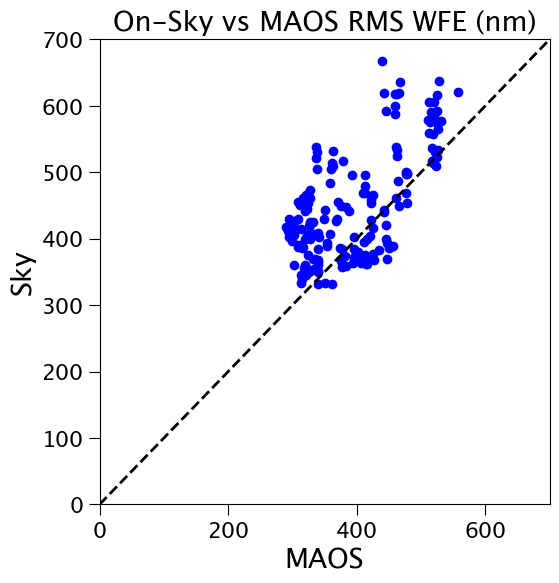

In [20]:
plt.close()
plt.scatter(maos_rmswfes_clean, corr_skyrmswfes, color="blue")
plt.title("On-Sky vs MAOS RMS WFE (nm)")
plt.xlabel('MAOS')
plt.ylabel('Sky')
plt.axline((0, 0), (1, 1), linewidth=2, color='black', linestyle="--")
plt.ylim(0.0, 700.0)
plt.xlim(0.0, 700.0)
plt.show()

**Cross-Checking with Ramey Data**

In [3]:
ramey = pd.read_csv('/u/emily_ramey/work/Keck_Performance/data/combined_data/keck_AO_metadata.dat')

In [91]:
merged = pd.merge(ramey, pd.to_numeric(all_frames['mjd']), on=['mjd'], how='inner')

In [4]:
sorted_ramey = ramey.sort_values(by='mass', ascending=False)